## Cost Prediction Model

**Definition** : A linear regression machine learning model focused on estimating medical insurance costs based on multiple factors.

**Machine Learning Tools** : scikit-learn (Python)

**Visualization Libraries** : Seaborn, Matplotlib

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Dataframe Analysis

- Dataframe creation
- View first *n* rows
- Dimensionality *(rows, columns)*
- Summary information
- Function to count the null values
- Retrieval of column names
- Statistics from the dataframe

In [3]:
# Creates the dataframe
df = pd.read_csv("insurance.csv")

In [4]:
# Retrieves the topmost rows of the dataframe (specified, default=5)
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Tuple representing dimensionality (rows, columns)
df.shape

(1338, 7)

In [6]:
# Summary of the dataframe for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Counts the null values
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# Returns a list of the column names
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# Descriptive statistics of the dataset's distribution
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

- Countplot to show data distribution
- Barplot for comparing columns
- Boxenplot displays distribution from the median - *Identify the outliers*
- Histplot to show distributions of datasets

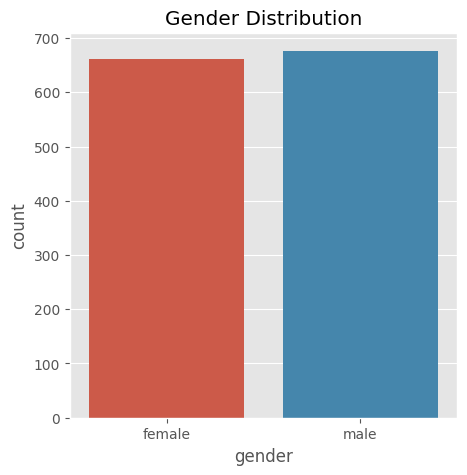

In [10]:
# Creates a countplot for specified column (gender)
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='gender', data=df, hue='gender')
plt.title('Gender Distribution')
plt.show()

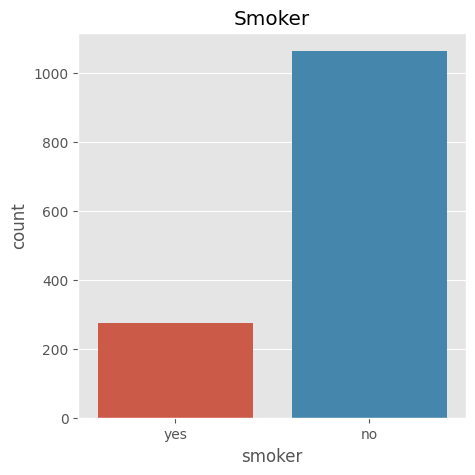

In [11]:
# Distribution of smokers in the dataset
plt.figure(figsize=(5, 5))
sns.countplot(x='smoker', data=df, hue='smoker')
plt.title('Smoker')
plt.show()

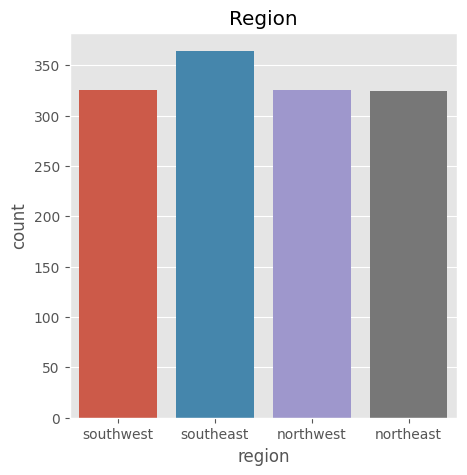

In [12]:

plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df, hue='region')
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Cost vs Region')

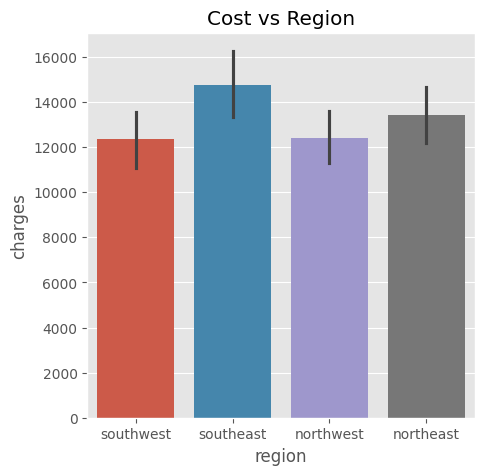

In [13]:
# Barplot used to compare columns
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df, hue='region')
plt.title('Cost vs Region')

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='gender', y='charges', data=df, hue='smoker')
plt.title('Charges for smokers')

<Axes: xlabel='region', ylabel='charges'>

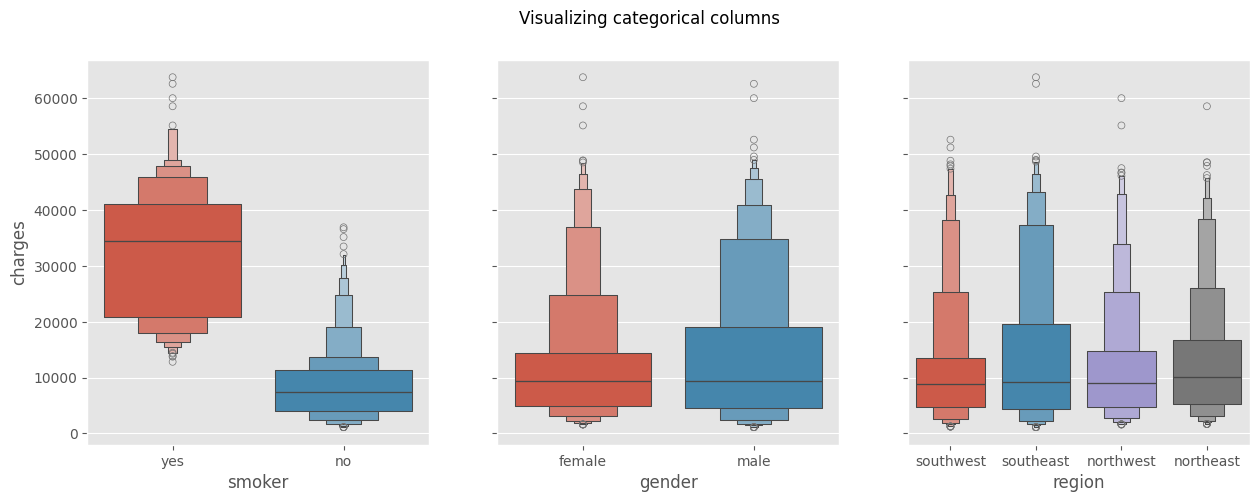

In [14]:
# Boxen plot : shows data distribution from the median of dataset (Thickest line in column)
# Great at showing the data outliers to stakeholders 
# Best with larger datasets, boxplots used with smaller datasets
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)
# subplots(one row, three graphs)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y='charges', data=df, ax=axes[0], hue='smoker')
sns.boxenplot(x='gender', y='charges', data=df, ax=axes[1], hue='gender')
sns.boxenplot(x='region', y='charges', data=df, ax=axes[2], hue='region')

In [ ]:
df[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(10, 10), color='blue')
plt.show()

## Linear Regression Model Approach

1. Convert categorical values to numerical values
2. Heatmap visualization to evaluate attributes with a high correlation - *Drop low correlation column(s)*
3. Train Test Split - *Train the model*
4. Create the model 
5. Fit the model
6. Performance evaluation - *R2 Score*
7. Visualize results
8. Make predictions 

In [15]:
# Converting categorical values into numerical values
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df['gender'] = df['gender'].apply({'male': 0, 'female': 1}.get)
df['smoker'] = df['smoker'].apply({'yes': 1, 'no': 0}.get)
df['region'] = df['region'].apply({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}.get)

In [17]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


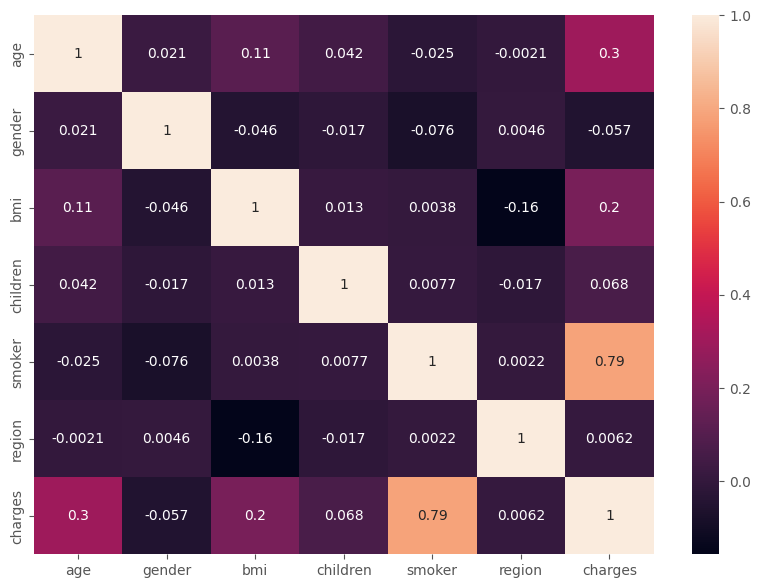

In [18]:
# Create a heatmap to view attributes with a high correlation
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Light values = high correlation
# Dark values = low correlation

In [19]:
# Building the model : Separate dataset into training and testing data

# X data - Drop columns with low correlation
x = df.drop(['charges', 'gender'], axis=1)
# Y data - Add the target column
y = df.charges

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (936, 5)
x_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


In [21]:
# Create the linear regression model

# Load the model
linreg = LinearRegression()

In [22]:
# Fit the data on the model
linreg.fit(x_train, y_train)
# Create a variable to store the predicted values
pred=linreg.predict(x_test)

In [23]:
# Check how well the data fits the model by calculating the r2 score
# The r2 score is and indication of how well the data fits the model (A high value indicates a good fit)
from sklearn.metrics import r2_score

In [24]:
print("R2 score: ", (r2_score(y_test, pred)))

R2 score:  0.7697211527941855


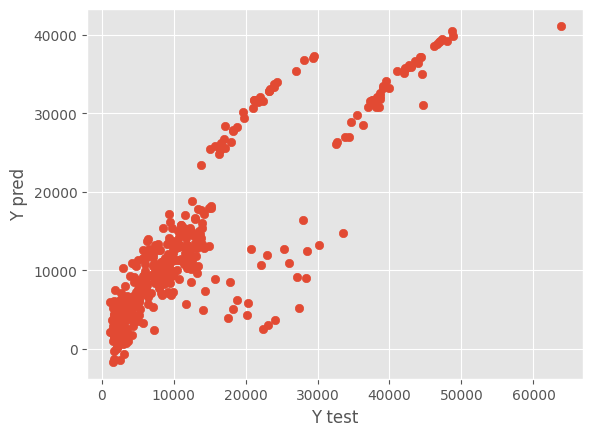

In [25]:
# Plotting a graph to understand how well a model predicts 
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [26]:
# Predict the insurance cost for a new customer 

# Sample data (Middle-aged, non-smoker, total children = 2, healthy bmi, southeast - region)
data = {'age': 50, 'bmi': 25, 'children': 2, 'smoker': 0, 'region': 2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [27]:
cost_pred = linreg.predict(cust_df)
print("The medical cost of the new customer is: ", round(*cost_pred, 2))

The medical cost of the new customer is:  9579.87


In [28]:
# Sample data (Middle-aged, smoker, unhealthy bmi, no children, southeast - region)
data = {'age': 50, 'bmi': 34, 'children': 0, 'smoker': 1, 'region': 2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,34,0,1,2


In [29]:
cost_pred = linreg.predict(cust_df)
print("The medical cost of the new customer is: ", round(*cost_pred, 2))

The medical cost of the new customer is:  35458.42


In [30]:
# Sample data (Middle-aged, non-smoker, healthy bmi, no children, southeast - region))
data = {'age': 50, 'bmi': 17, 'children': 4, 'smoker': 1, 'region': 2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,17,4,1,2


In [31]:
cost_pred = linreg.predict(cust_df)
print("The medical cost of the new customer is: ", round(*cost_pred, 2))

The medical cost of the new customer is:  31300.08


In [32]:
# Sample data (Teenager, smoker, unhealthy bmi, northeast - region)
data = {'age': 17, 'bmi': 31, 'children': 0, 'smoker': 1, 'region': 4}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,17,31,0,1,4


In [33]:
cost_pred = linreg.predict(cust_df)
print("The medical cost of the new customer is: ", round(*cost_pred, 2))

The medical cost of the new customer is:  26449.2


In [34]:
# Sample data (Teenager, non-smoker, healthy bmi, northeast - region)
data = {'age': 17, 'bmi': 23, 'children': 0, 'smoker': 0, 'region': 4}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,17,23,0,0,4


In [35]:
cost_pred = linreg.predict(cust_df)
print("The medical cost of the new customer is: ", round(*cost_pred, 2))

The medical cost of the new customer is:  64.96
